# Task Description

In [26]:
"""
Task 2: Predict Future Stock Prices (Short-Term)
Objective:
Use historical stock data to predict the next day's closing price.
Dataset:
Stock market data from Yahoo Finance (retrieved using the yfinance Python library)
Instructions:
● Select a stock (e.g., Apple, Tesla).
● Load historical data using the yfinance library.
● Use features like Open, High, Low, and Volume to predict the next Close price.
● Train a Linear Regression or Random Forest model.
● Plot actual vs predicted closing prices for comparison.
Skills:
● Time series data handling
● Regression modeling
● Data fetching using APIs (yfinance)
● Plotting predictions vs real data
"""

"\nTask 2: Predict Future Stock Prices (Short-Term)\nObjective:\nUse historical stock data to predict the next day's closing price.\nDataset:\nStock market data from Yahoo Finance (retrieved using the yfinance Python library)\nInstructions:\n● Select a stock (e.g., Apple, Tesla).\n● Load historical data using the yfinance library.\n● Use features like Open, High, Low, and Volume to predict the next Close price.\n● Train a Linear Regression or Random Forest model.\n● Plot actual vs predicted closing prices for comparison.\nSkills:\n● Time series data handling\n● Regression modeling\n● Data fetching using APIs (yfinance)\n● Plotting predictions vs real data\n"

##  Installing Required Libraries

In [27]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


##  Stock Data

In [29]:
# Step 1: Select a stock and load historical data
ticker = 'TSLA' 
# ticker = 'AAPL'
# ticker = 'GOOG'
df = yf.download(ticker, start='2022-01-01', end='2024-12-31')

C:\Users\Muhammad Bilal\AppData\Local\Temp\ipykernel_70984\2805624649.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


## Preparing the Dataset 

In [30]:
# Step 2: Use Open, High, Low, Volume to predict next day's Close
df = df[['Open', 'High', 'Low', 'Volume', 'Close']].dropna()
df['Next_Close'] = df['Close'].shift(-1)  # Target is next day's Close
df = df.dropna()


## Features and Target

In [31]:
# Step 3: Prepare features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

In [32]:
# Step 4: Split into train and test sets (no shuffle since it's time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## Model Training

In [33]:
# Step 5: Train the model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Prediction

In [34]:
# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
y_pred

array([175.12800018, 176.25000015, 177.53390274, 178.86070312,
       175.55309891, 176.53950043, 176.14360001, 178.64600296,
       172.92030319, 174.7609993 , 177.91640244, 177.37720276,
       169.43000031, 172.7527002 , 187.98230057, 179.71049728,
       186.10110001, 188.77959839, 181.19679825, 180.69770004,
       189.16949783, 186.74759872, 192.51149857, 197.547901  ,
       199.36650192, 212.46230164, 225.03806915, 244.64943176,
       244.23173325, 256.54536636, 258.35820175, 264.47119568,
       256.97983307, 247.12839844, 258.39770096, 254.78269943,
       254.93550034, 252.80206528, 241.0504657 , 248.56336609,
       252.45013458, 219.92386795, 221.51816818, 217.82929947,
       232.87093414, 224.41293442, 235.10713455, 225.02613327,
       212.07606964, 196.22380005, 194.58940018, 194.05769989,
       191.75539871, 197.03260162, 196.86960251, 197.03600082,
       196.74049896, 215.46840225, 216.26463562, 214.42203415,
       223.20356674, 220.02770126, 217.72146667, 222.20

## Actual vs Predicted Closing Prices

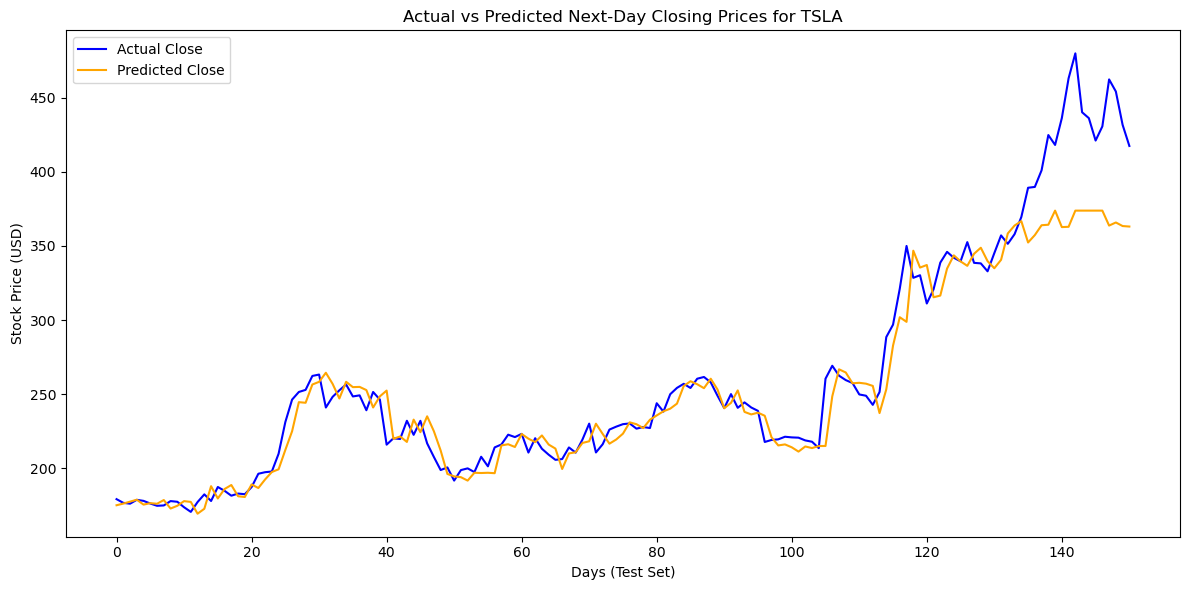

In [35]:
 # Step 7: Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='orange')
plt.title(f"Actual vs Predicted Next-Day Closing Prices for {ticker}")
plt.xlabel("Days (Test Set)")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()